# MLP_trainieren

In [1]:
#Imports
import random
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt


from evolutionary_search import EvolutionaryAlgorithmSearchCV
from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
from sklearn.linear_model import SGDClassifier, LogisticRegression, Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV #, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer, LabelEncoder, MaxAbsScaler, MinMaxScaler
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from tensorflow.python.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.losses import MSE, binary_crossentropy, categorical_crossentropy, sparse_categorical_crossentropy, kl_divergence
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.python.keras import Input
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.wrappers.scikit_learn import KerasClassifier

In [2]:
X,y = fetch_openml(data_id=554,return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=.8)

c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:2178: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [4]:
#Die Standardarchitektur des Modells festlegen
def build_nn(activation = 'relu', 
             learning_rate = 3e-2, 
             optimizer = SGD):
    model = Sequential()
    model.add(Dense(300,activation=activation))
    model.add(Dense(100,activation=activation))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss=categorical_crossentropy, 
                  optimizer= optimizer(learning_rate = learning_rate), 
                  metrics=["accuracy"])
    return model


### Classifier ohne pipeline

In [5]:
clf = KerasClassifier(build_nn)

In [6]:
#Klassifikator trainieren
clf.fit(X_train, y_train)

1750/1750 [==============================] - 6s 3ms/step - loss: 1691886009.5451 - accuracy: 0.1089


In [7]:
#Klassifikator testen
y_pred = clf.predict(X_test)
accuracy_score(y_true=y_test,y_pred=y_pred)

c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.11242857142857143

### Simple Pipeline

In [8]:
#Pipeline
#Klassifikator Pipeline
steps = [
            ('preprocessing', StandardScaler()),
            ('clf',  KerasClassifier(build_nn) )
        ]
pipe = Pipeline(steps=steps)

#### Simple Pipeline Score:

In [9]:

#Klassifikator trainieren
pipe.fit(X_train, y_train)

1750/1750 [==============================] - 6s 3ms/step - loss: 0.4779 - accuracy: 0.8643


Pipeline(memory=None,
     steps=[('preprocessing', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x00000247C1050C08>)])

In [10]:
#Klassifikator testen
y_pred = pipe.predict(X_test)
accuracy_score(y_true=y_test,y_pred=y_pred)

c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9484285714285714

### Confusion Matrix

In [11]:
Vor_cm = confusion_matrix(y_pred, y_test)

In [12]:
Vor_cm

array([[1361,    0,    6,    2,    1,    2,    3,    2,    3,    2],
       [   0, 1531,    4,    1,    3,    3,    4,    3,   17,    5],
       [   1,    8, 1335,    9,    4,    4,    5,    7,    8,    2],
       [   5,   13,   14, 1325,    1,   46,    0,    2,   52,   20],
       [   2,    2,   14,    4, 1317,    8,    4,   16,   11,   35],
       [   6,    7,    2,   16,    2, 1191,   20,    1,   40,    5],
       [   9,    0,    6,    2,    6,    6, 1302,    0,    5,    1],
       [   1,    2,   19,   22,    5,    9,    0, 1423,    8,   34],
       [   3,    9,   10,    7,    1,    8,    1,    0, 1206,    5],
       [   4,    2,    3,   11,   21,    4,    0,   18,   23, 1287]],
      dtype=int64)

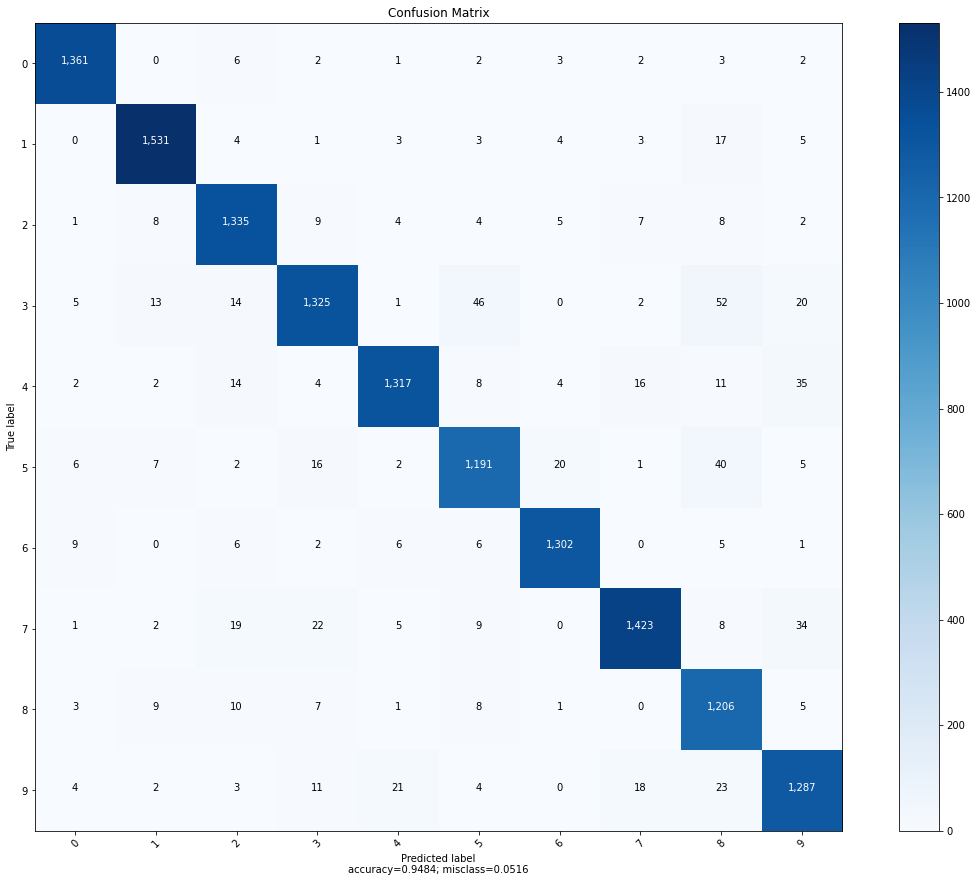

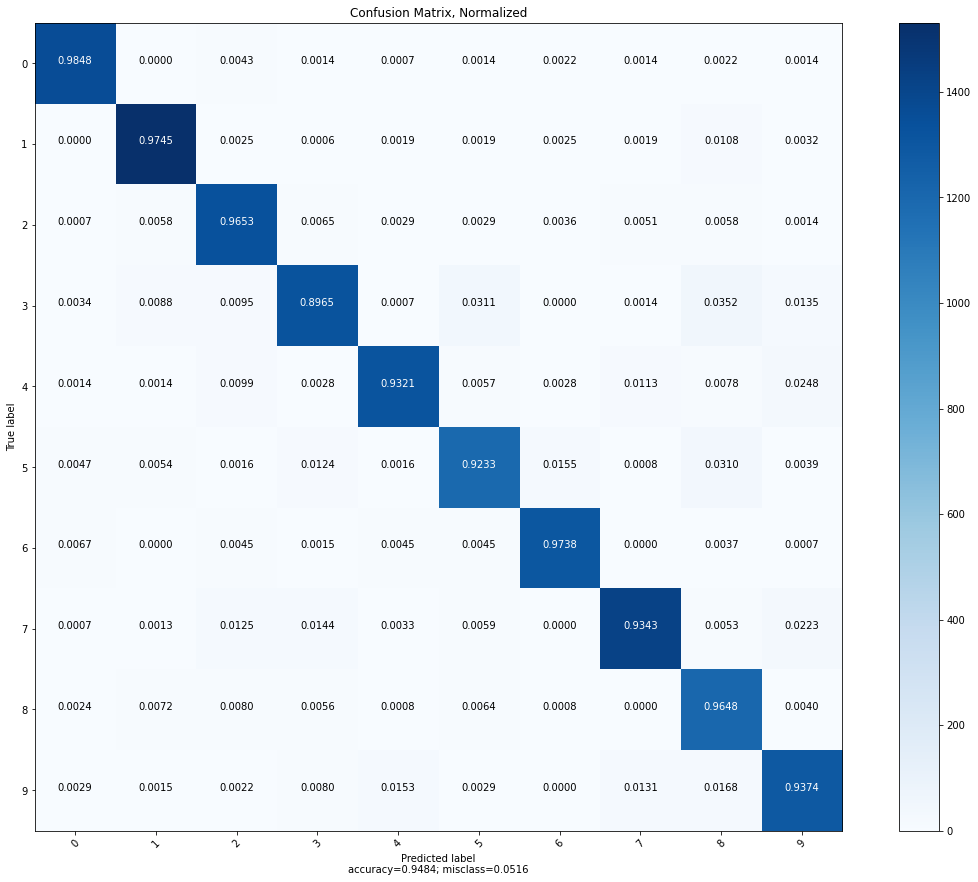

In [13]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph
                          
   colors [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(16, 12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
plot_confusion_matrix(cm           = np.array(Vor_cm), 
                      normalize    = False,
                      target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
                      title        = "Confusion Matrix")

plot_confusion_matrix(cm           = np.array(Vor_cm), 
                      normalize    = True,
                      target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
                      title        = "Confusion Matrix, Normalized")

 